###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license © 2016 L.A. Barba, N.C. Clementi, G.F. Forsyth.  Based on [JITcode-MechE](https://github.com/barbagroup/JITcode-MechE), also under CC-BY and MIT licenses, 2014.

# Jupyter Notebooks

## Intro to the python scientific stack 

Welcome to Jupyter notebooks, a place where you can combine markdown text, LaTeX equations, code and results in a single document. 

In this notebook we will introduce useful python libraries that are important if you want to do scientific computing. We will learn:

* How to import data, manipulate arrays and do operations with them using [Numpy](http://www.numpy.org/).

* How to do nice plots using [matplotlib](http://matplotlib.org/).

## Context — Earth temperature over time

Is global temperature rising? How much? This is a question of burning importance in today's world!

Data about global temperatures are available from several sources: NASA, the National Climatic Data Center (NCDC) and the University of East Anglia in the UK. Check out the [University Corporation for Atmospheric Research](https://www2.ucar.edu/climate/faq/how-much-has-global-temperature-risen-last-100-years) (UCAR) for an in-depth discussion.

The [NASA Goddard Space Flight Center](http://svs.gsfc.nasa.gov/goto?3901) is one of our sources of global climate data. They produced this video showing a color map of the changing global surface **temperature anomalies** from 1880 to 2011.

The term [global temperature anomaly](https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php) means the difference in temperature with respect to a reference value or a long-term average. It is a very useful way of looking at the problem and in many ways better than absolute temperature. For example, a winter month may be colder than average in Washington DC, and also in Miami, but the absolute temperatures will be different in both places.

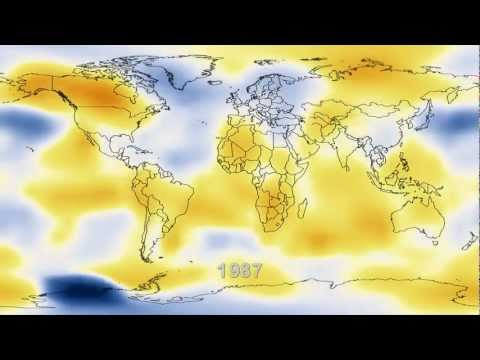

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('lyb4gau3LyI')

How would we go about understanding the _trends_ from the data on global temperature?

The first step in analyzing unknown data is to generate some simple plots using **matplotlib**. We are going to look at the temperature-anomaly history, contained in a file, and make our first plot to explore this data. 

We are going to smooth the data and then we'll fit a line to it to find a trend, plotting along the way to see how it all looks.

Let's get started!

### Step 1: Read a data file.

We took the data from the [NOAA](https://www.ncdc.noaa.gov/cag/) (National Oceanic and Atmospheric Administration) webpage. Feel free to play around with the webpage and analize data by your own. Meantime we select some data and which is contained in the folder `resources`.

First we will download the data form the web by using some Python magic and invoke the command `wget` and we will save the file in the folder `resources` under the name:

`land_global_temperature_anomaly-1880-2015.csv`

This file contains the year and month on the first column and 12 monthly averages of land temperature anomaly listed sequentially on the second column, from 1880 to 2015. We will read the file, then make an initial plot to see what it looks like.


In the NOAA web page you can select the data that you want to download as  a `cvs` file and this will automatically open another tab with the data. We want to get that data so we will use `wget` but instead from a terminal we will invoke it from the notebook, yes! from the notebook.

To run shell commands in the notebook we just need to use an exclamation mark `!` before the command:


In [2]:
!wget -O resources/land_global_temperature_anomaly-1880-2015.csv  https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv 

--2016-11-30 15:01:18--  https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv
Resolving www.ncdc.noaa.gov (www.ncdc.noaa.gov)... 205.167.25.172, 205.167.25.171, 2610:20:8040:2::171, ...
Connecting to www.ncdc.noaa.gov (www.ncdc.noaa.gov)|205.167.25.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘resources/land_global_temperature_anomaly-1880-2015.csv’

resources/land_glob     [ <=>                ]  23.24K  --.-KB/s    in 0.02s   

2016-11-30 15:01:18 (1.50 MB/s) - ‘resources/land_global_temperature_anomaly-1880-2015.csv’ saved [23799]



We got the data! Now we need to load it so we can work with it. The first thing to do is to load our favorite library: the **NumPy** library for array operations.

In [3]:
import numpy

Pretty easy, right? Now to load the file, we use a function from the NumPy library called `loadtxt()`. To tell Python where to look for this function, we precede the function name with the library name, and use a dot between the two names. You can read the documentation in this [link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html), although this is how it works:

In [4]:
numpy.loadtxt(fname='resources/land_global_temperature_anomaly-1880-2015.csv', delimiter=',', skiprows=4)

array([[  1.88001000e+05,  -1.72000000e-01],
       [  1.88002000e+05,  -5.76500000e-01],
       [  1.88003000e+05,  -7.50400000e-01],
       ..., 
       [  2.01510000e+05,   1.34570000e+00],
       [  2.01511000e+05,   1.29680000e+00],
       [  2.01512000e+05,   1.87450000e+00]])

Note that we called the function with three parameters: the file name and path, the delimiter that separates each value on a line (a comma in this case), and `skiprows=4` what tells Numpy to ommit the first 4 rows that in our file are a description of the file. Note that the first two parameters are strings (made up of characters) and we put them in quotes.

As the output of the function, we get an array. Because it's rather big, Python shows only a few rows and columns of the array. 

So far, so good. Now, what if we want to manipulate this data? Or plot it? We need to refer to it with a name. We've only just read the file, but we did not assign the array any name! Let's try again.

In [5]:
T_land = numpy.loadtxt(fname='resources/land_global_temperature_anomaly-1880-2015.csv', delimiter=',', skiprows=4)

That's interesting. Now, we don't see any output from the function call. Why? It's simply that the output was stored into the variable `T`, so to see it, we can do:

In [6]:
print(T_land)

[[  1.88001000e+05  -1.72000000e-01]
 [  1.88002000e+05  -5.76500000e-01]
 [  1.88003000e+05  -7.50400000e-01]
 ..., 
 [  2.01510000e+05   1.34570000e+00]
 [  2.01511000e+05   1.29680000e+00]
 [  2.01512000e+05   1.87450000e+00]]


Ah, there it is! Let's find out how big the array is. For that, we use a cool NumPy function called shape():

In [7]:
numpy.shape(T_land)

(1632, 2)

Again, we've told Python where to find the function shape() by attaching it to the library name with a dot. However, NumPy arrays also happen to have a property shape that will return the same value, so we can get the same result another way:

In [8]:
T_land.shape

(1632, 2)

It's just shorter. The array T holding our temperature-anomaly data has two columns and 1632 rows. Since we said we had monthly data, how many years is that?

In [9]:
1632/12

136.0

That's right: from 1880 through 2015.

### Step 2: Plot the data.

We will display the data in two ways: as a time series of the monthly temperature anomalies versus time, and as a histogram. To be fancy, we'll put both plots in one figure.

Let's first load our plotting library, called matplotlib. To get the plots inside the notebook (rather than as popups), we use a special command, %matplotlib inline:

In [10]:
from matplotlib import pyplot
%matplotlib inline

What's this `from` business about?  `matplotlib` is a pretty big (and awesome!) library.  All that we need is a subset of the library for creating 2D plots, so we ask for the `pyplot` module of the `matplotlib` library.  

Plotting the time series of temperature is as easy as calling the function [`plot()`](http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.plot) from the module `pyplot`.  

But remember the shape of `T_land`? It has two columns and the temperature-anomaly values are in the second column. We extract the values of the second column by specifying 1 as the second index (the first column has index 0) and using the colon notation `:` to mean *all rows*. Check it out: 

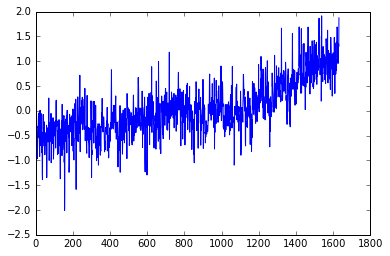

In [11]:
pyplot.plot(T_land[:,1])

You can add a semicolon at the end of the plotting command to avoid that stuff that appeared on top of the figure, that `Out[x]: [< ...>]` ugliness. Try it.

*Do you see a trend in the data?*

The plot above is certainly useful, but wouldn't it be nicer if we could look at the data relative to the year, instead of the location of the data in the array?

The plot function can take another input; let's get the year displayed as well.

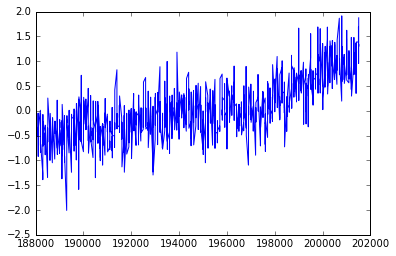

In [12]:
pyplot.plot(T_land[:,0],T_land[:,1]);

What happen? It does not look like the previous plot. It looks a litlle sparse. Do you know why? Notice that in the `csv` file the column for the years are integers, and even though we understand what they mean, is that what we want to plot? Let's take a closer look by just plotting the first two years. 

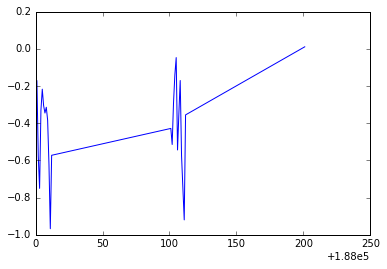

In [13]:
pyplot.plot(T_land[0:25,0],T_land[0:25,1]);

Do you notice what is going on? We are not using the right scale to plot our dates. However, **Python** is really cool and we can solve this in a nice and neat way. We will use [`numpy.arange()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) and specifying a data type for dates that you can explore in depth in this [link](https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html). 

In [14]:
date = numpy.arange('1880', '2016', dtype=('datetime64[M]'))

We passed to `numpy.arange()` three arguments, the beginning and the end of the array, and  `dtype=datetime64[M]` that indicates that we want to show every month in the range determined by the beginning and end of the array. Let's print some of the elements of the array `date`: 

In [15]:
print (date[0:15])

['1880-01' '1880-02' '1880-03' '1880-04' '1880-05' '1880-06' '1880-07'
 '1880-08' '1880-09' '1880-10' '1880-11' '1880-12' '1881-01' '1881-02'
 '1881-03']


We create this array but we can not use it directly to plot, we need a dummy array of the same length of our data array. Then we will use the `date` array to plot the ticks on the `x-axis` for some point of the `dummy` array. 

In [16]:
len(T_land)

1632

The `dummy` array should contain 1632 equally space elements but it doesn't matter we it starts and when it finishes. For simplity we will start in 1 and finish in 1632. We will use [`numpy.linspace()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create our array. The first argument indicates the start of the array, the second the end, and the third one indicates the amount of elements we want our array to have.

In [17]:
dummy = numpy.linspace(1, 1632, 1632)

We will use this array and the `date` array to make the plot again but now in the `x-axis` we will plot the `date`. Because plotting all the months will end up being non-readable, we will use **slices** to plot the `x-ticks` each ten years (120 months).    

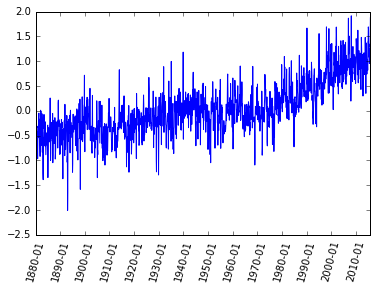

In [18]:
pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)
pyplot.plot(dummy,T_land[:,1]);

Now we have a better plot but if I give you this plot without any information you would not be able to figure out what kinda of data is plot. We need labels in the axis, a title and why not a better color, font and size of the ticks. 
**Publishing quality** plots should be always your standard for plotting. How you present your data will allow others (and probably you in the future) to understand your better your work. 

Let's make the font of a specific size and type. This next lines of code will apply for all the following plots. 

In [19]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

We are going to plot the same plot than before but now we will add few things to make it prettier and **publishing quality**.

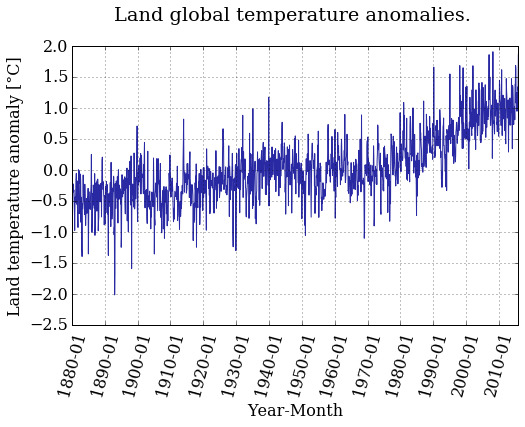

In [33]:
pyplot.figure(figsize=(8,5))
pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)
pyplot.plot(dummy,T_land[:,1], color='#2929a3', ls='-', lw=1)
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid();

Better ah? Feel free to play arund with the parameters and see how it changes. 

*Do you see a trend in the data?*

The temperature anomaly certainly seems to show an increasing trend. But we're not going to stop there, of course. It's not that easy to convince people that the planet is warming, as you know.

Plotting a histogram is as easy as calling the function `hist()`. Why should it be any harder?

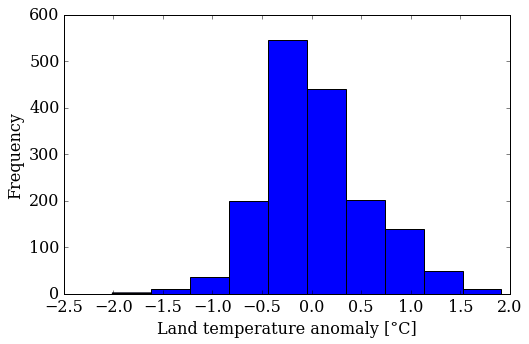

In [79]:
pyplot.figure(figsize=(8,5))
pyplot.hist(T_land[:,1])
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Frequency');

You can control several parameters of the [`hist()`](http://matplotlib.org/1.3.1/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist) plot. Learn more by reading the manual page (yes, you have to read the manual sometimes!). The first option is the number of bins—the default is 10—but you can also change the appearance (color, transparency). Try some things out.

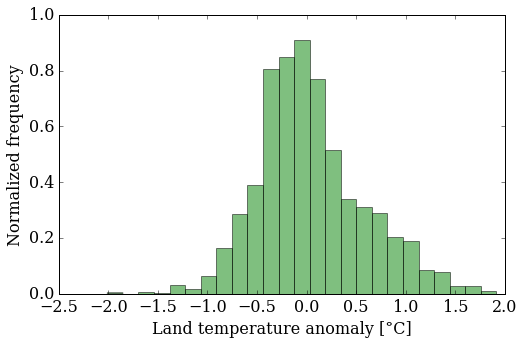

In [80]:
pyplot.figure(figsize=(8,5))
pyplot.hist(T_land[:,1], 25, normed=True, facecolor='g', alpha=0.5)
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized frequency');

What does this plot tell you about the data? It's more interesting than just an increasing trend, that's for sure. You might want to look at more statistics now: mean, median, standard deviation ... NumPy makes that easy for you:

In [55]:
mean_T = numpy.mean(T_land[:,1])
median_T = numpy.median(T_land[:,1])

print('The mean value is {:.5} and the median {:.5}'.format(mean_T, median_T))

The mean value is 0.04238 and the median -0.02915


In [59]:
variance_T = numpy.var(T_land[:,1])
sigma_T = numpy.sqrt(variance_T)
print('The variance is {:.5} and the standard deviation {:.5}'.format(variance_T, sigma_T))

The variance is 0.28669 and the standard deviation 0.53544


With these data now we can plot the probability density function (pdf) that correspond to this data, compare with the histogram and see how far from a normal distribution are we.
In order to do that, we need to import the module [`stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) from **Scipy**, another great python library that contains tools for scientific computing. 

In [82]:
from scipy import stats

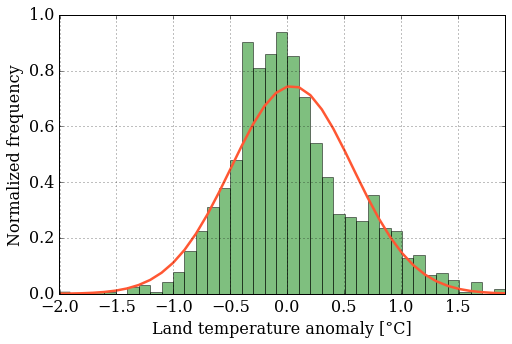

In [83]:
bins = numpy.linspace(min(T_land[:,1]), max(T_land[:,1]), 40)

pyplot.figure(figsize=(8,5))
pyplot.hist(T_land[:,1], x, normed=True, facecolor='g', alpha=0.5)
pyplot.plot(bins, stats.norm.pdf(bins, mean_T, sigma_T), color='#ff5733', ls='-', lw=2.5)
pyplot.xlim(min(T_land[:,1]), max(T_land[:,1]))
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized frequency')
pyplot.grid();

In [21]:
#Ignore this cell, It simply loads a style for the notebook.

from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()